# First, create your text file and upload it using the uploader widget below.

In [35]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

In [28]:

# This is the uploader widget
def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

## Next, write a function in the cell below that iterates through the words in text file, removes punctuation, and counts the frequency of each word. Oh, and be sure to make it ignore boring words like "and" or "the". Then use it in the generate_from_frequencies() function to generate your very own wordcloud! 

In [29]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER CODE START HERE
    words = file_contents.split(" ")
    
    words_list = []
    
    for word in words:
        for uninteresting_word in uninteresting_words:
            if word is not uninteresting_word:
                words_list.append(word)
    
    for word in words_list:
        if not word.isalpha():
            word = ''.join([letter for letter in word if word.isalpha()])
    
    words_dict = {}
    
    
    for word in words_list:
        if word not in words_dict.keys():
            words_dict[word] = words_list.count(word)
    
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(words_dict)
    return cloud.to_array()

## If you've done everything correctly, your wordcloud image should appear below!

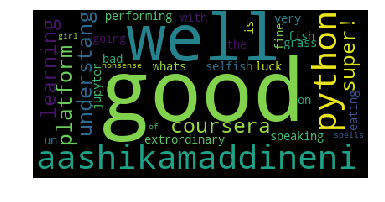

In [34]:
file_contents="aashikamaddineni python coursera learning platform good understang super! extrordinary very well speaking is performing well bad luck fine good whats going on selfish fish eating grass un the jupyter with nonsense spells of girl"
myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()